## Neural Networks - Lambda School

Neural networks are an old idea in computational neuroscience, one that keeps on giving. Originally formulated from the theory of neuron activation in the 1940s, the first computational model of a neural network was built in 1958, the perceptron.

Neural nets are:

![A neural network with a hidden layer](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/560px-Artificial_neural_network.svg.png)

Author: [Cburnett](https://en.wikipedia.org/wiki/User:Cburnett)

* A layer of "neurons", that is, an array of floats. Each neuron is a weight.


* A bias neuron for each layer. The bias of the layer produces a y-intercept going into the next layer.

* A set of output neurons: the sum of all the weighs and biases

* A rectifier function $\sigma$ for each neuron. This just caps the value of any neuron and doesn't let it "go crazy". The original was the Sigmoid (1), followed by the ReLU (2), followed by the "Smooth ReLU", (3). Typically all three can be represented with \sigma() (4).

Popular rectifiers include:

$\sigma(x) = \frac{1}{1-\exp{x}}$

$\sigma(x) = ReLU(x)$

$\sigma(x) = LReLU(x)$

$\sigma(x) = PReLU(x)$


The simplest neural net is this:

![The simplest neural net: $\sigma(w_1x+b)$](https://www.lucidchart.com/publicSegments/view/21af3bf0-68c0-41a5-8270-4a9f8f5bb019/image.png)

The value of each neuron is equal to:

(5) $n_x = f(n_{x-1}) + b_i$

(6) $f_x = \sigma(f(n_{x-1}) + b_i)$

This is a recursive relationship - the final neuron n_n is the sum of all of the preceding terms. We calculate them in a forward direction by feeding an input data vector `d_i` into the first set of neurons `n_0` and \sigmoid and multiplying all the way to the end.

![Array diagram of a neural net](https://www.lucidchart.com/publicSegments/view/09e01af1-1156-4a76-a2d6-39c14fd24373/image.png)

As you can see, the storage requirement of a neural net is $O(mn^2)$ where $m$ is the number of hidden layers and $n$ is the dimensionality of $X$.

## Backpropagation

Backpropagation lets us use the derivative of the final output set of neurons with respect to their target values in order to improve the quality of all the preceding connections.

[3Blue1Brown](http://www.3blue1brown.com/)

## Loss calculation

Review the great neural network material in Google's Machine Learning Crash Course:

[Google ML CC](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/video-lecture)

Complete the full lessons in

![Introduction to Neural Nets, Training Neural Nets, and Multi-Class Neural Nets](https://www.dropbox.com/s/nxxhp9vm7xqtr8a/Screenshot%202018-05-29%2011.25.21.png?raw=1)

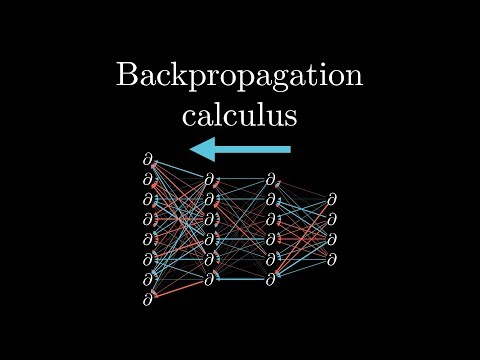

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('tIeHLnjs5U8')


Scikit Learn provides an easy to use and experiment with NN library, `MLPClassifier`. `MLPClassifier` doesn't support parallelization or GPUs and as such is not valuable for Deep Learning, but it suits our purposes for this assignment.

[MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

During this course we have studied a multitude of free available datasets including:

* titanic
* iris
* cars
* digits
* churn
* faces
* traffic infractions



In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import seaborn as sns

titanic = sns.load_dataset('titanic')

# drop duplicate/analogous columns
titanic = titanic.drop(['alive',
                        'adult_male',
                        'who',
                        'class',
                        'embark_town'], axis=1)

# take care of missing data
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')

# convert binomials and categoricals to encoded labels
for label in ['embarked', 'sex', 'alone']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])

print(titanic.head())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = titanic['survived']
X = titanic.drop(['survived'],axis=1)

# MPL Classifier
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
                    hidden_layer_sizes=(15, 2),
                    activation='logistic',
                    solver='sgd',
                    alpha=1e-5,
                    batch_size=100, 
                    learning_rate='adaptive',
                    learning_rate_init=1,
                    max_iter=200,
                    shuffle=True,
                    random_state=42,
                    verbose=10,
                    tol=1e-4 )
cross_val = KFold(n_splits=10, random_state=42)
scores = cross_val_score(model, X, y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - MLPClassifier: ", scores.mean())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    1  22.0      1      0   7.2500         2      0
1         1       1    0  38.0      1      0  71.2833         0      0
2         1       3    0  26.0      0      0   7.9250         2      1
3         1       1    0  35.0      1      0  53.1000         2      0
4         0       3    1  35.0      0      0   8.0500         2      1
Iteration 1, loss = 0.65173611
Iteration 2, loss = 0.66431107
Iteration 3, loss = 0.61551422
Iteration 4, loss = 0.64781172
Iteration 5, loss = 0.69366492
Iteration 6, loss = 0.63676602
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.200000
Iteration 7, loss = 0.74562345
Iteration 8, loss = 0.64673211
Iteration 9, loss = 0.63685726
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.040000
Iteration 10, loss = 0.64093715
Iteration 11, loss = 0.64257546
I

Iteration 33, loss = 0.66841826
Iteration 34, loss = 0.66841822
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Mean AUC Score - MLPClassifier:  0.5418260808099579


In [0]:
model = MLPClassifier(
                    hidden_layer_sizes=(15, 2),
                    activation='relu',
                    solver='lbfgs',
                    alpha=1e-5,
                    batch_size=100, 
                    learning_rate='constant',
                    learning_rate_init=1,
                    max_iter=2000,
                    shuffle=True,
                    random_state=42,
                    verbose=10,
                    tol=1e-4 )
cross_val = KFold(n_splits=10, random_state=42)
scores = cross_val_score(model, X, y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - MLPClassifier: ", scores.mean())

Mean AUC Score - MLPClassifier:  0.8109567674575591


In [0]:
model = MLPClassifier(
                    hidden_layer_sizes=(15, 4),
                    activation='relu',
                    solver='lbfgs',
                    alpha=1e-5,
                    batch_size=100, 
                    learning_rate='adaptive',
                    learning_rate_init=0.0001,
                    max_iter=2000,
                    shuffle=True,
                    random_state=42,
                    verbose=10,
                    tol=1e-4 )
cross_val = KFold(n_splits=10, random_state=42)
scores = cross_val_score(model, X, y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - MLPClassifier: ", scores.mean())

Mean AUC Score - MLPClassifier:  0.8599380839786473


# Assignment

Select two or more of the above datasets. Load them, clean them, and prepare them for NN training. Use the following tutorial on MLP Training Curves as your guideline: 

[MLP Training Curves Example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html)

Produce the same graphs from the above example, demonstrating the loss over time of the MLP classifier on the different datasets, different learning rates, and different hidden layer configurations.

![curves](https://www.dropbox.com/s/v707n4e5egscz6q/Screenshot%202018-05-29%2011.29.05.png?raw=1)




In [15]:
#prepare titanic data
titanic_X = titanic.drop('survived', axis=1)
print(titanic_X.shape)

titanic_labels = titanic['survived'].values.reshape(-1, 1)
titanic_labels.shape

(891, 8)


(891, 1)

Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.980000
Training set loss: 0.096922
training: constant with momentum
Training set score: 0.973333
Training set loss: 0.068020
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.050277
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.979983
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504017
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504760
training: adam
Training set score: 0.980000
Training set loss: 0.046248

learning on dataset digits
training: constant learning-rate


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.971619
Training set loss: 0.146841
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling learning-rate
Training set score: 0.638843
Training set loss: 1.855465
training: inv-scaling with momentum
Training set score: 0.912632
Training set loss: 0.290584
training: inv-scaling with Nesterov's momentum
Training set score: 0.909293
Training set loss: 0.318387
training: adam
Training set score: 0.991653
Training set loss: 0.045934

learning on dataset titanic
training: constant learning-rate


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score: 0.818182
Training set loss: 0.428211
training: constant with momentum
Training set score: 0.814815
Training set loss: 0.423699
training: constant with Nesterov's momentum
Training set score: 0.819304
Training set loss: 0.420185
training: inv-scaling learning-rate
Training set score: 0.616162
Training set loss: 0.612722
training: inv-scaling with momentum
Training set score: 0.786756
Training set loss: 0.478032
training: inv-scaling with Nesterov's momentum
Training set score: 0.786756
Training set loss: 0.479691
training: adam
Training set score: 0.831650
Training set loss: 0.407480


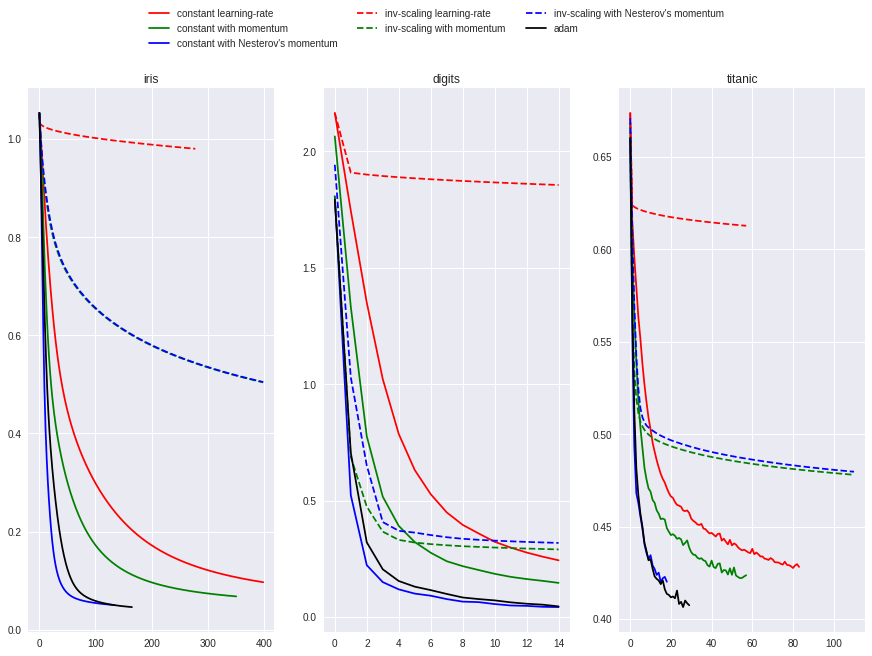

In [18]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .5,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1, 3, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
boston_data = datasets.load_boston()
data_sets = [(iris.data, iris.target),
             (digits.data, digits.target),
             (titanic_X, titanic_labels)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits','titanic']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


In [21]:
#https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
iris = datasets.load_iris()
import pandas as pd
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
y_iris = data1['target']
x_iris = data1.drop(['target'],axis=1)

In [25]:
model = MLPClassifier(
                    hidden_layer_sizes=(15, 2),
                    activation='tanh',
                    solver='lbfgs',
                    alpha=1e-5,
                    batch_size=1000, 
                    learning_rate='adaptive',
                    learning_rate_init=1,
                    max_iter=200,
                    shuffle=True,
                    random_state=42,
                    verbose=10,
                    tol=1e-4 )
cross_val = KFold(n_splits=10, random_state=42)
try:
  scores = cross_val_score(model, x_iris, y_iris, cv=cross_val, scoring='roc_auc')
except ValueError:
    pass  
print("Mean AUC Score - MLPClassifier: ", scores.mean())

Mean AUC Score - MLPClassifier:  0.5418260808099579
